In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
file_path = 'Resources/average_student_loan_debt.csv' 
df_loans = pd.read_csv(file_path)

df_loans.head()

,Graduating Class,Average Student Loan Debt
0,1993,"9,320.00"
1,1994,"10,349.00"
2,1995,"11,491.00"
3,1996,"12,759.00"
4,1997,"13,767.00"


In [2]:
# Cleaning the dataset
df_loans.columns = df_loans.columns.str.strip()  # Remove extra spaces from column names
df_loans['Average Student Loan Debt'] = df_loans['Average Student Loan Debt'].str.replace(',', '').astype(float)  # Remove commas and convert to float


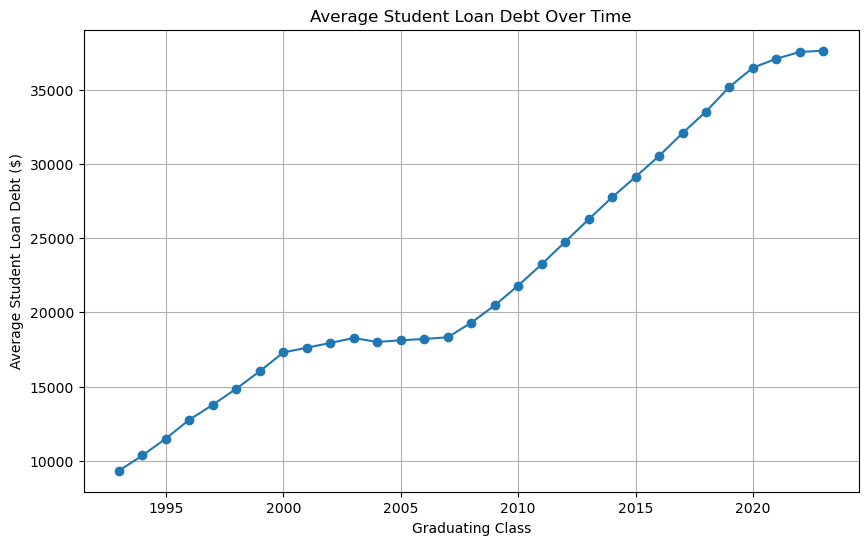

In [3]:
# Create the plot and add labels
plt.figure(figsize=(10, 6))
plt.plot(df_loans['Graduating Class'], df_loans['Average Student Loan Debt'], marker='o')

plt.title('Average Student Loan Debt Over Time')
plt.xlabel('Graduating Class')
plt.ylabel('Average Student Loan Debt ($)')
plt.grid(True)

plt.show()

In [20]:
# Load dataset #2 to work on the correlation analysis
file_pathtwo = 'Resources/number_houses_sold.csv' 
df = pd.read_csv(file_pathtwo)

df.head()

,Year,Total (USA),Northeast,MidWest,South,West
0,1963.0,560,87.0,134.0,199.0,141.0
1,1964.0,565,90.0,146.0,200.0,129.0
2,1965.0,575,94.0,142.0,210.0,129.0
3,1966.0,461,84.0,113.0,166.0,99.0
4,1967.0,487,77.0,112.0,179.0,119.0


In [5]:
#Cleaning the dataset #2
df['Total by Regions'] = df[['Northeast', 'MidWest', 'South', 'West']].sum(axis=1)
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)
print("Cleaned Data:")
print(df[['Year', 'Total by Regions']].head())


Cleaned Data:
   Year  Total by Regions
0  1963             561.0
1  1964             565.0
2  1965             575.0
3  1966             462.0
4  1967             487.0


In [6]:
#average homes sold per year
average_total_by_year = df.groupby('Year')['Total by Regions'].mean().reset_index()

average_total_by_year.columns = ['Year', 'Average Total by Year (Thousands)']


print("Average Total by Year DataFrame:")
print(average_total_by_year)

Average Total by Year DataFrame:
    Year  Average Total by Year (Thousands)
0   1963                              561.0
1   1964                              565.0
2   1965                              575.0
3   1966                              462.0
4   1967                              487.0
..   ...                                ...
56  2019                              683.0
57  2020                              822.0
58  2021                              771.0
59  2022                              641.0
60  2023                              668.0

[61 rows x 2 columns]


In [7]:
#exporting the new dataset with the averages to csv
output_file_path = 'Resources/average_number_of_house_sold_by_year_output.csv'
average_total_by_year.to_csv(output_file_path, index=False)


In [8]:
#loading the new dataset
df_homes = pd.read_csv(output_file_path)
df_homes.head()

,Year,Average Total by Year (Thousands)
0,1963,561.0
1,1964,565.0
2,1965,575.0
3,1966,462.0
4,1967,487.0


In [9]:
#Descriptive Statistics: 1. avg # of homes sold by year & 2. avg student loan debt by year
home_stats = df_homes.describe()
loan_stats = df_loans.describe()

home_stats, loan_stats

(              Year  Average Total by Year (Thousands)
 count    61.000000                          61.000000
 mean   1993.000000                         655.131148
 std      17.752934                         201.924613
 min    1963.000000                         306.000000
 25%    1978.000000                         509.000000
 50%    1993.000000                         641.000000
 75%    2008.000000                         757.000000
 max    2023.000000                        1282.000000,
        Graduating Class  Average Student Loan Debt
 count         31.000000                  31.000000
 mean        2008.000000               22752.645161
 std            9.092121                8737.249405
 min         1993.000000                9320.000000
 25%         2000.500000               17456.500000
 50%         2008.000000               19300.000000
 75%         2015.500000               29845.000000
 max         2023.000000               37650.000000)

In [14]:
# Checking the unique years in each dataset
unique_years_homes = df_homes['Year'].unique()
unique_years_loans = df_loans['Graduating Class'].unique()

# Filter home sales data to match the years in the student loan debt data because for loans the dataset starts from 1993 where as for homes sold starts from 1963
df_homes_filtered = df_homes[df_homes['Year'].isin(unique_years_loans)]

# Merge the filtered data on the year columns
df_combined_filtered = pd.merge(df_homes_filtered, df_loans, left_on='Year', right_on='Graduating Class')

# making sure column is string type before replacing commas
if df_combined_filtered['Average Student Loan Debt'].dtype != 'object':
    df_combined_filtered['Average Student Loan Debt'] = df_combined_filtered['Average Student Loan Debt'].astype(str)

# Converting Average Student Loan Debt to numeric after replacing commas
df_combined_filtered['Average Student Loan Debt'] = pd.to_numeric(df_combined_filtered['Average Student Loan Debt'].str.replace(',', ''), errors='coerce')

# Sorting the data by Average Student Loan Debt to be used for plotting the regression line
df_combined_filtered = df_combined_filtered.sort_values('Average Student Loan Debt')



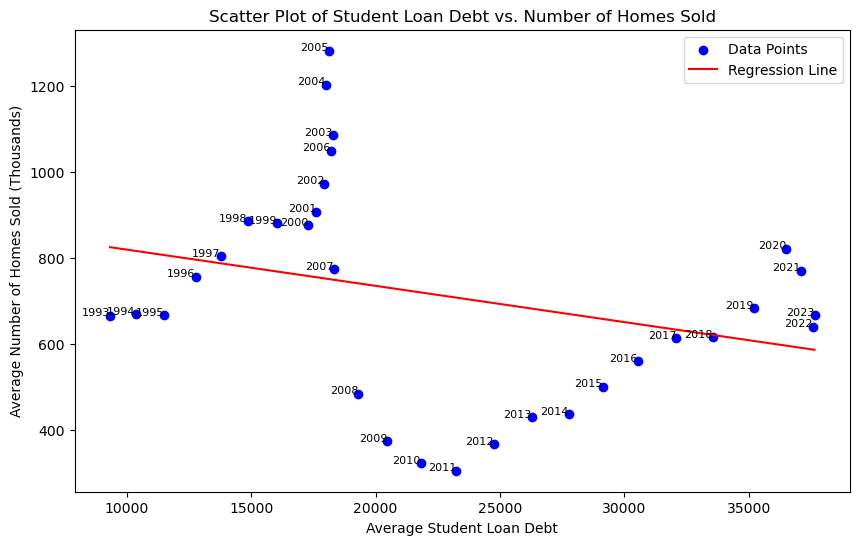

In [28]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_combined_filtered['Average Student Loan Debt'], df_combined_filtered['Average Total by Year (Thousands)'], color='blue', label='Data Points')

# define each data point with the corresponding year
for i in range(df_combined_filtered.shape[0]):
    plt.text(df_combined_filtered['Average Student Loan Debt'].iloc[i], df_combined_filtered['Average Total by Year (Thousands)'].iloc[i], 
             df_combined_filtered['Year'].iloc[i], fontsize=8, ha='right')

# Calculating the regression line
X = df_combined_filtered['Average Student Loan Debt']
y = df_combined_filtered['Average Total by Year (Thousands)']
coefficients = np.polyfit(X, y, 1)
polynomial = np.poly1d(coefficients)
regression_line = polynomial(X)

# Plotting the regression line
plt.plot(X, regression_line, color='red', label='Regression Line')


plt.title('Scatter Plot of Student Loan Debt vs. Number of Homes Sold')
plt.xlabel('Average Student Loan Debt')
plt.ylabel('Average Number of Homes Sold (Thousands)')
plt.legend()
plt.show()

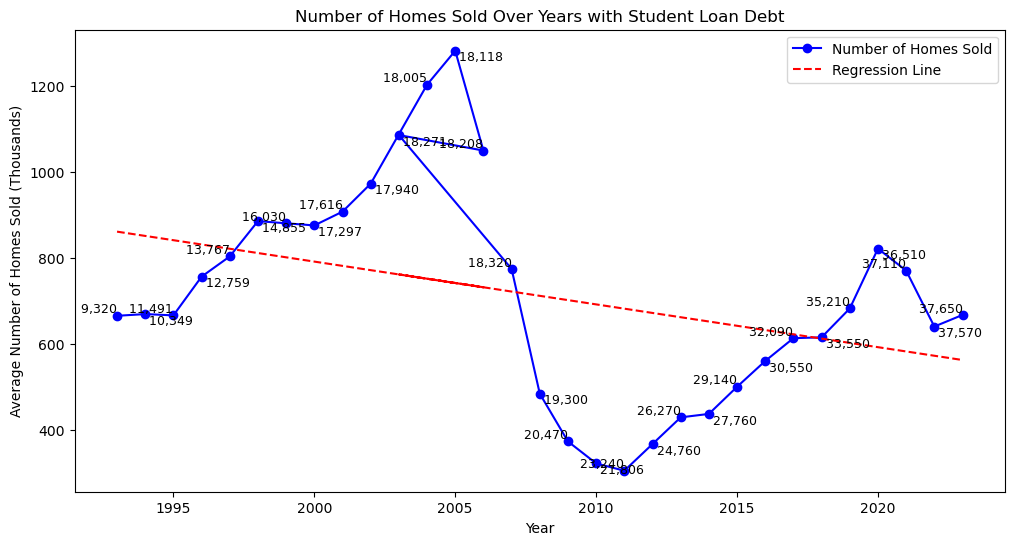

In [29]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_combined_filtered['Year'], df_combined_filtered['Average Total by Year (Thousands)'], marker='o', linestyle='-', color='blue', label='Number of Homes Sold')

# Annotate each data point with the corresponding average student loan debt
for i in range(df_combined_filtered.shape[0]):
    plt.text(df_combined_filtered['Year'].iloc[i], df_combined_filtered['Average Total by Year (Thousands)'].iloc[i], 
             f" {df_combined_filtered['Average Student Loan Debt'].iloc[i]:,.0f}", fontsize=9, 
             ha='right' if i % 2 == 0 else 'left', va='bottom' if i % 2 == 0 else 'top')

# Calculate the regression line
X = df_combined_filtered['Year']
y = df_combined_filtered['Average Total by Year (Thousands)']
coefficients = np.polyfit(X, y, 1)
polynomial = np.poly1d(coefficients)
regression_line = polynomial(X)

# Plot the regression line
plt.plot(X, regression_line, color='red', linestyle='--', label='Regression Line')

# Add titles and labels
plt.title('Number of Homes Sold Over Years with Student Loan Debt')
plt.xlabel('Year')
plt.ylabel('Average Number of Homes Sold (Thousands)')
plt.legend()
plt.show()